In [2]:
student_name = "Md Asaduzzaman Shahin"
student_id = "48225320"

### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="Fig1 The Combined E commerce Dataset.png" align="left" width="500"/>  


(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
import pandas as pd

df = pd.read_csv('The E-commerce Dataset.csv')

# Display the DataFrame before removing missing data
print("Before removing missing data:")
print(df)

# Count the number of Null values in each column
null_counts = df.isnull().sum()
print("\nNumber of Null values in each column:")
print(null_counts)

# Remove records with missing values and assign the result to a new DataFrame
cleaned_df = df.dropna(subset=['gender', 'rating', 'helpfulness'])
cleaned_df = cleaned_df[cleaned_df['review'] != 'none']  # Remove records with missing review using boolean indexing

# Display the DataFrame after removing missing data
print("\nAfter removing missing data:")
print(cleaned_df)

# Print the length of the data before and after removing missing data
print("\nLength of the data before removing missing data:", len(df))
print("Length of the data after removing missing data:", len(cleaned_df))

Before removing missing data:
       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                               

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [4]:
# your code and solutions
# Q2.1
unique_users = cleaned_df['userId'].nunique()
unique_reviews = cleaned_df['review'].nunique()
unique_items = cleaned_df['item_id'].nunique()
unique_categories = cleaned_df['category'].nunique()

print(f"Unique users: {unique_users}")
print(f"Unique reviews: {unique_reviews}")
print(f"Unique items: {unique_items}")
print(f"Unique categories: {unique_categories}")

# Q2.2
total_ratings = cleaned_df['rating'].count()
mean_rating = cleaned_df['rating'].mean()
std_rating = cleaned_df['rating'].std()
min_rating = cleaned_df['rating'].min()
max_rating = cleaned_df['rating'].max()

print(f"\nTotal ratings: {total_ratings}")
print(f"Mean rating: {mean_rating}")
print(f"Standard deviation of ratings: {std_rating}")
print(f"Minimum rating: {min_rating}")
print(f"Maximum rating: {max_rating}")

# Q2.3
gender_item_counts = cleaned_df.groupby('gender')['item_id'].count()
mean_items_rated = gender_item_counts.mean()
std_items_rated = gender_item_counts.std()
max_items_rated = gender_item_counts.max()
min_items_rated = gender_item_counts.min()

print(f"\nMean items rated by gender: {mean_items_rated}")
print(f"Standard deviation of items rated by gender: {std_items_rated}")
print(f"Maximum items rated by gender: {max_items_rated}")
print(f"Minimum items rated by gender: {min_items_rated}")

# Q2.4
item_rating_counts = cleaned_df.groupby('item_id')['rating'].count()
mean_ratings_received = item_rating_counts.mean()
std_ratings_received = item_rating_counts.std()
max_ratings_received = item_rating_counts.max()
min_ratings_received = item_rating_counts.min()

print(f"\nMean ratings received by item: {mean_ratings_received}")
print(f"Standard deviation of ratings received by item: {std_ratings_received}")
print(f"Maximum ratings received by item: {max_ratings_received}")
print(f"Minimum ratings received by item: {min_ratings_received}")

Unique users: 8562
Unique reviews: 19459
Unique items: 89
Unique categories: 9

Total ratings: 19916
Mean rating: 3.7017975497087767
Standard deviation of ratings: 1.4044507218710878
Minimum rating: 1.0
Maximum rating: 5.0

Mean items rated by gender: 9958.0
Standard deviation of items rated by gender: 233.3452377915607
Maximum items rated by gender: 10123
Minimum items rated by gender: 9793

Mean ratings received by item: 223.77528089887642
Standard deviation of ratings received by item: 116.41898790858319
Maximum ratings received by item: 939
Minimum ratings received by item: 139


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

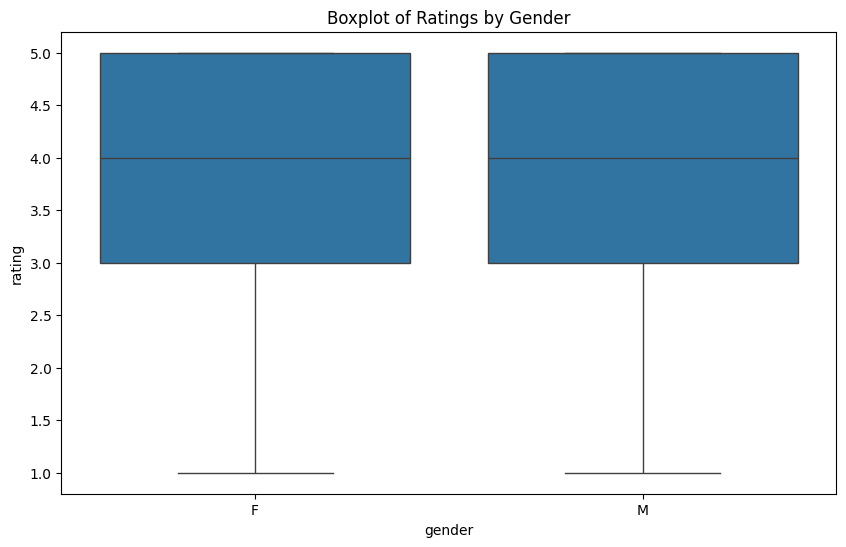

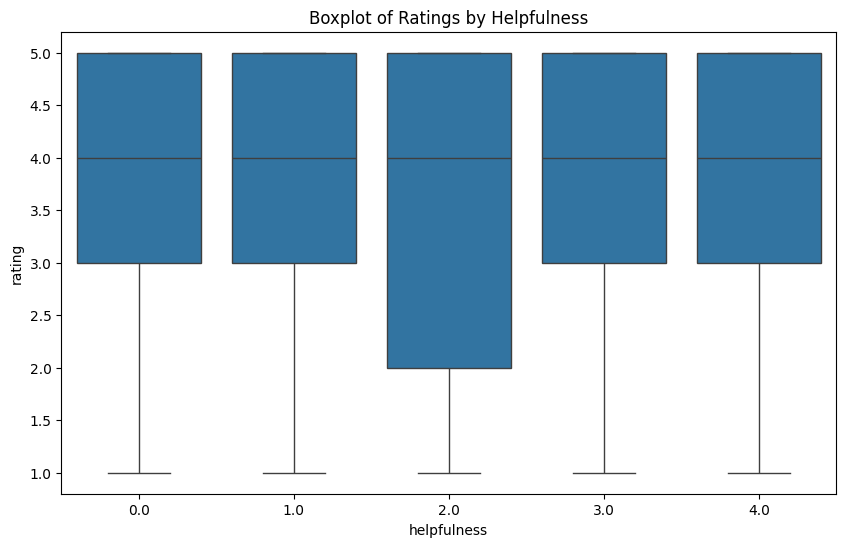

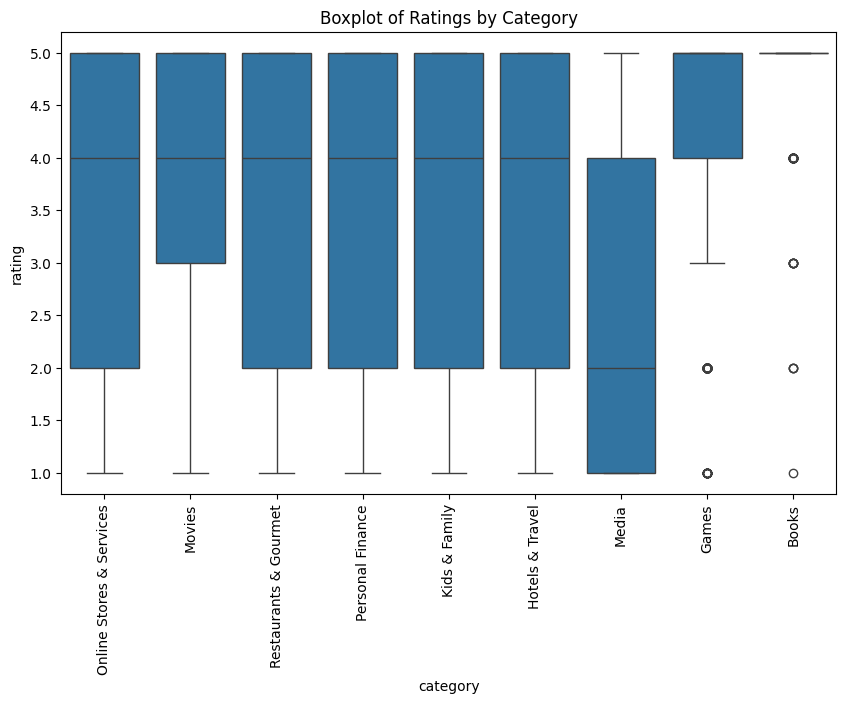

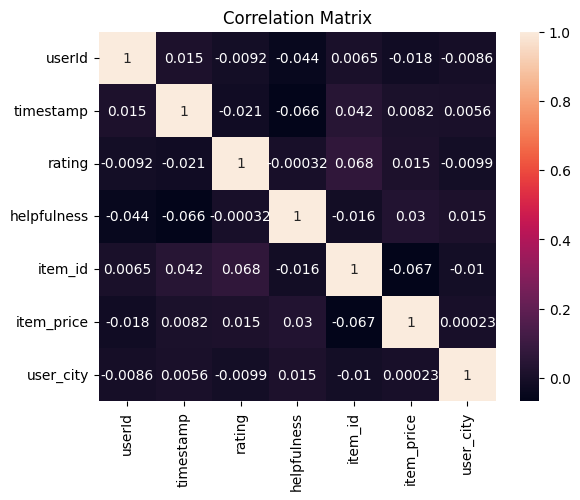

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming cleaned_df is your DataFrame

# Boxplot for gender vs ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='rating', data=cleaned_df)
plt.title('Boxplot of Ratings by Gender')
plt.show()

# Boxplot for helpfulness vs ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='helpfulness', y='rating', data=cleaned_df)
plt.title('Boxplot of Ratings by Helpfulness')
plt.show()

# Boxplot for category vs ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='rating', data=cleaned_df)
plt.xticks(rotation=90)
plt.title('Boxplot of Ratings by Category')
plt.show()

# Correlation matrix
# Select only numeric columns for the correlation matrix
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
corr_matrix = cleaned_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [6]:
# your code and solutions
# Rule 1: Remove reviews with helpfulness no more than 2
cleaned_df = cleaned_df[cleaned_df['helpfulness'] > 2]

# Rule 2: Remove users who rate less than 7 items
user_counts = cleaned_df['userId'].value_counts()
cleaned_df = cleaned_df[cleaned_df['userId'].isin(user_counts[user_counts >= 7].index)]

# Rule 3: Remove items that receive less than 11 ratings
item_counts = cleaned_df['item_id'].value_counts()
cleaned_df = cleaned_df[cleaned_df['item_id'].isin(item_counts[item_counts >= 11].index)]

# Print the length of the data
print(f"Length of the data after removing outliers: {len(cleaned_df)}")

Length of the data after removing outliers: 2685


In [11]:
# Rule 1: Remove reviews with helpfulness no more than 2
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['helpfulness'] <= 2].index)

# Rule 2: Remove users who rate less than 7 items
cleaned_df = cleaned_df[cleaned_df.groupby('userId')['item_id'].transform('count') >= 7]

# Rule 3: Remove items that receive less than 11 ratings
cleaned_df = cleaned_df[cleaned_df.groupby('item_id')['rating'].transform('count') >= 11]

# Print the length of the data
print(f"Length of the data after removing outliers: {len(cleaned_df)}")

Length of the data after removing outliers: 2508
